<a href="https://colab.research.google.com/github/Fuad3004/ANN-Artificial_Neural_Network/blob/main/ANN_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
import torch.nn  as nn

import matplotlib.pyplot as plt


In [3]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

#Train Model Function


In [4]:
def train_model(x,t):

  ANNregression= nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )

  loss_fn = nn.MSELoss()
  optimizer= torch.optim.SGD(ANNregression.parameters(),lr=0.01)

  epochs =500
  losses= torch.zeros(epochs)

  for epoch in range(epochs):

    #Foeward pass
    yHat= ANNregression(x)


    #Calcualte the loss
    loss= loss_fn(yHat, y)
    losses[epoch]=loss


    #BackPropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  prediction=ANNregression(x)

  return prediction,losses



#Data Function

In [5]:
def datafn(m):
  N=50
  x= torch.randn(N,1)
  y= m*x + torch.randn(N,1)/2

  return x,y

#Testing

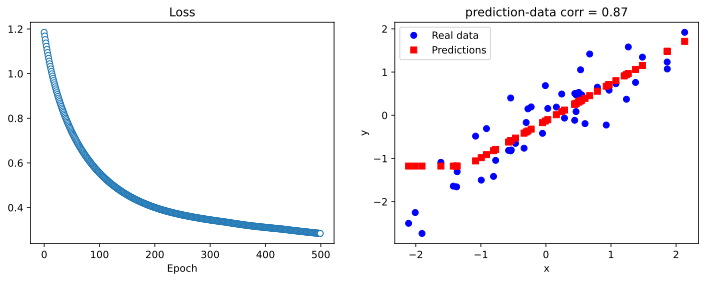

In [12]:
# create a dataset
x,y = datafn(.8)

# run the model
yHat,losses = train_model(x,y)
yHat = yHat.detach()

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat,'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.T)[0,1]:.2f}')
ax[1].legend()

plt.show()


#Experiment


In [14]:
slopes = np.linspace(-2,2,21)

numExps = 50

# initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):

  for N in range(numExps):

    x,y = datafn(slopes[slopei])

    yHat, losses = train_model(x,y)

    yHat =yHat.detach()

    results[slopei,N,0] = losses[-1]
    results[slopei,N,1] = np.corrcoef(y.T,yHat.T)[0,1]


# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0


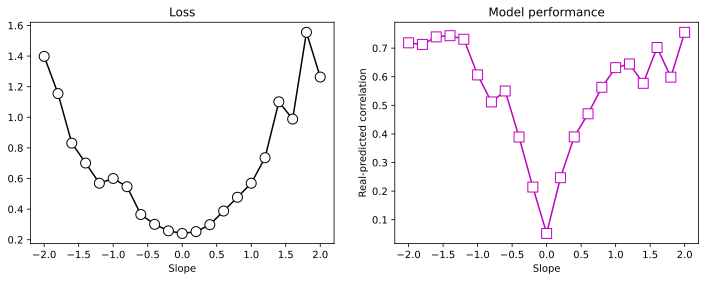

In [15]:

# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()

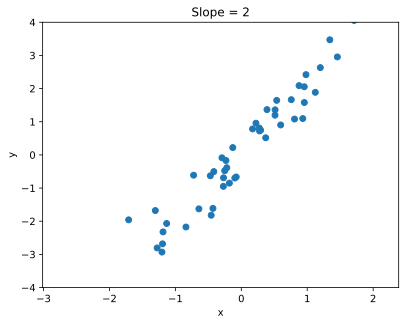

In [16]:

# extra code to visualize data with different slopes

m = 2

x,y = datafn(m)

plt.title('Slope = ' + str(m))
plt.plot(x,y,'o')
plt.ylim([-4,4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()